In [0]:
# Analysis

In [0]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set(font_scale=1.5)
pd.set_option('mode.chained_assignment', None)  # Ignore SettingOnCopy warning

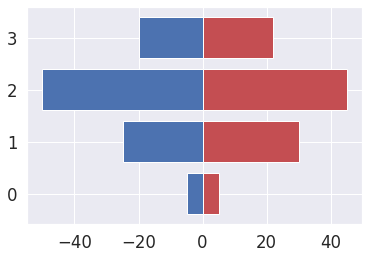

array([0, 1, 2, 3])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

women_pop = np.array([5., 30., 45., 22.])
men_pop     = np.array( [5., 25., 50., 20.])
X = np.arange(4)

plt.barh(X, women_pop, color = 'r')
plt.barh(X, -men_pop, color = 'b')
plt.show()
X

# Data loading and cleaning

In [28]:
# Database fetched on 6th May 2020C
d = pd.read_excel('/content/Covid_survey_sheet_final.xlsx')
n_initial = d.shape[0]
n_initial

361

In [29]:
d.columns 

Index(['ID', 'Timestamp', 'Age', 'Gender', 'occupation', 'Edu',
       'service_lockdown', 'state', 'Freq_handwash_before', 'soapwater_before',
       'plainwater_before', 'sanitizer_before', 'duration_before',
       'allsteps_before', 'cough_cloth_before', 'cough_handcover_before',
       'cough_elbow_before', 'social_before', 'Freq_handwash_after',
       'soapwater_after', 'plainwater_after', 'sanitizer_after',
       'duration_after', 'allsteps_after', 'cough_cloth_after',
       'cough_handcover_after', 'cough_elbow_after', 'social_after', 'mask'],
      dtype='object')

In [0]:
'''
# delete responses where people have not provided consent

d = d.rename( columns= {'मैंने ऊपर लिखे अध्ययन के बारे में दी गई जानकारी को पढ़ा और समझा है और मुझे सवाल पूछने का अवसर मिला है। मैं समझता हूं कि मेरी भागीदारी स्वैच्छिक है और मैं इस अध्ययन में भाग लेने के लिए अपनी सूचित सहमति देता हूं।मैं यह भी समझता हूं कि मैं किसी भी समय और किसी भी कारण से शोध से हट सकता हूं। मैं इस अध्ययन से उत्पन्न होने वाले किसी भी डेटा या परिणामों के उपयोग को प्रतिबंधित नहीं करने के लिए सहमत हूं, बशर्ते ऐसा उपयोग केवल वैज्ञानिक उद्देश्य के लिए हो I':'Consent',
            
                   'उम्र? (age)': 'Age', 'लिंग (gender)': 'Gender', 'आपका कामकाज/ व्यवसाय (occupation)': 'Occupation', 
                    'आपकी शिक्षा? (education)': 'Education', 
                    'क्या आप लॉकडाउन के दौरान आवश्यक सेवाओं में कोई योगदान कर रहे हैं ?  ( जैसे पुलिस, स्वास्थ्यकर्मी, वैज्ञानिक , शोधकर्ता, सुरक्षा कर्मी, राशन/दवाई की दुकान ,भोजन वितरण ,स्वयंसेवक इतियादि )': 'Services',
                    'आप वर्तमान में किस राज्य में रहते हैं  ?': 'State', 
                    'पहले औसतन (On average), आप दिन में कितनी बार हाथ धोया करते थे ? [कितनी बार?]': 'No_handwash_before',
                    'पहले आप अपने हाथ कैसे धोया करते थे  ? [साबुन और पानी से]': 'Soapwater_before',
                    'पहले आप अपने हाथ कैसे धोया करते थे  ? [सिर्फ पानी से]': 'Water_before',
                    'पहले आप अपने हाथ कैसे धोया करते थे  ? [अल्कोहल sanitizer से]': 'Sanitiser_before',
                    'पहले आप साबुन और पानी से अपने हाथ कितने समय के लिए धोते थे  ?': 'Time_soapwater_before',
                    'क्या आपने साबुन पानी से ऐसे तरीके से हाथ धोये जिसमें ----> हथेली, हाथ के पीछे, उंगलियों के बीच में, नाखून, अंगूठे, कलाई शामिल हो ?': 'Mode_handwash_before',
                    'याद कीजिये जब आपको खासी या छींक आयी तो आपने क्या किया ? [मुंह कपडे से ढका ]': 'Sneeze_cloth_before',
                    'याद कीजिये जब आपको खासी या छींक आयी तो आपने क्या किया ? [मुंह हाथ से ढका ]': 'Sneeze_hand_before',
                    'याद कीजिये जब आपको खासी या छींक आयी तो आपने क्या किया ? [ऊपरी बाजू में खाँसा/छींका]': 'Sneeze_arm_before',
                    'अगर आपने हाथ में खाँसा या छींका, तो उसके उपरान्त क्या आपने अपने हाथ धोये?': 'Sneeze_handwash_before',
                    ' क्या आप पहले सामाजिक दूरी का पालन करते थे ? ( उदाहरण के तौर पर अगर आप कभी दुकान पर गए और आपने लोगों  से एक  मीटर की दूरी बनायीं रखी )':'Socialdistance_before',
                    'आजकल , औसतन (average) आप दिन में कितनी बार हाथ धोते हैं ? [कितनी बार?]': 'No_handwash_now',
                    'आजकल आप अपने हाथ कैसे धोते हैं ? [साबुन और पानी से]': 'Soapwater_now',
                    'आजकल आप अपने हाथ कैसे धोते हैं ? [सिर्फ पानी से]':'Water_now',
                    'आजकल आप अपने हाथ कैसे धोते हैं ? [अल्कोहल sanitizer से]': 'Sanitiser_now',
                    'आजकल आप कितनी बार साबुन पानी से ऐसे तरीके से हाथ धोते हैं  --->  जिसमें हथेली, हाथ के पीछे, उंगलियों के बीच में, नाखून, अंगूठे, कलाई शामिल हो )?': 'Mode_handwash_now',
                    'आजकल आप साबुन और पानी से अपने हाथ कितने समय के लिए धोते हैं ?': 'Time_soapwater_now',
                    'याद कीजिये पिछले कुछ दिनों में जब आपको खासी/छींक आयी, तो आपने क्या किया ? [मुंह कपडे से ढका]': 'Sneeze_cloth_now',
                   'याद कीजिये पिछले कुछ दिनों में जब आपको खासी/छींक आयी, तो आपने क्या किया ? [मुंह हाथ से ढका]': 'Sneeze_hand_now',
                   'याद कीजिये पिछले कुछ दिनों में जब आपको खासी/छींक आयी, तो आपने क्या किया ? [ऊपरी बाजू में खाँसा या छींका]': 'Sneeze_arm_now',
                   'अगर आपने हाथ में खाँसा या छींका, तो उसके उपरान्त क्या आपने अपने हाथ धोये?.1': 'Sneeze_handwash_now',
                   'क्या आप आजकल सामाजिक दूरी का पालन करते हैं  ? ( उदाहरण के तौर पर अगर आप कभी दुकान पर गए और आपने लोगों  से एक  मीटर की दूरी बनायीं रखी )': 'Socialdistance_now',
                   'क्या आजकल आप घर से बाहर जाते समय मास्क लगाते हैं ?': 'Mask_now'
                   })
                   
'''

In [30]:
# Add ID column
d['ID'] = range(d.shape[0])
d.columns

Index(['ID', 'Timestamp', 'Age', 'Gender', 'occupation', 'Edu',
       'service_lockdown', 'state', 'Freq_handwash_before', 'soapwater_before',
       'plainwater_before', 'sanitizer_before', 'duration_before',
       'allsteps_before', 'cough_cloth_before', 'cough_handcover_before',
       'cough_elbow_before', 'social_before', 'Freq_handwash_after',
       'soapwater_after', 'plainwater_after', 'sanitizer_after',
       'duration_after', 'allsteps_after', 'cough_cloth_after',
       'cough_handcover_after', 'cough_elbow_after', 'social_after', 'mask'],
      dtype='object')

In [31]:
# delete resposes which have not given consent
d= d.loc[d['consent'] ==1,:]
d.shape

KeyError: ignored

In [0]:
'''
# PYTHON CHANGE: removed 'ID' from this list as it does not exist yet.
keeps = ['Age', 'Gender', 'Occupation', 'Education',
       'Services', 'State', 'No_handwash_before', 'Soapwater_before',
       'Water_before', 'Sanitiser_before', 'Time_soapwater_before',
       'Mode_handwash_before', 'Sneeze_cloth_before', 'Sneeze_hand_before',
       'Sneeze_arm_before', 'Sneeze_handwash_before', 'Socialdistance_before',
       'No_handwash_now', 'Soapwater_now', 'Water_now', 'Sanitiser_now',
       'Mode_handwash_now', 'Time_soapwater_now', 'Sneeze_cloth_now',
       'Sneeze_hand_now', 'Sneeze_arm_now', 'Sneeze_handwash_now',
       'Socialdistance_now', 'Mask_now', 'ID']

d = d[keeps]
'''

In [32]:
# Exclusion criteria. Missing values on age and gender
d = d[d['Age'].notnull() & 
      d['Gender'].notnull()]
n_nomiss = d.shape[0]
n_nomiss

361

In [33]:
d.head()

,ID,Timestamp,Age,Gender,occupation,Edu,service_lockdown,state,Freq_handwash_before,soapwater_before,plainwater_before,sanitizer_before,duration_before,allsteps_before,cough_cloth_before,cough_handcover_before,cough_elbow_before,social_before,Freq_handwash_after,soapwater_after,plainwater_after,sanitizer_after,duration_after,allsteps_after,cough_cloth_after,cough_handcover_after,cough_elbow_after,social_after,mask
0,0,2020-04-29 18:40:05.241,59,2,सरकारी नौकरी ( Govt. job),2,2.0,Chandigarh,2,3,2,1,4,2,2,3,1,2,2,4,2,2,3,3,3,3,2,4,4
1,1,2020-04-29 18:42:48.866,35,1,सरकारी नौकरी ( Govt. job),1,1.0,Rajasthan,2,2,4,1,2,3,2,4,2,2,3,4,4,2,3,4,3,3,4,4,4
2,2,2020-04-29 18:43:29.583,36,1,सरकारी नौकरी ( Govt. job),1,1.0,punjab,1,3,4,1,1,2,2,4,1,1,2,4,1,3,3,4,2,1,4,4,4
3,3,2020-04-29 18:46:36.197,25,1,स्व रोज़गार (self employed),3,2.0,Punjab,1,2,1,4,3,4,4,1,1,3,1,3,1,4,3,4,4,1,1,3,4
4,4,2020-04-29 18:51:18.490,25,1,स्व रोज़गार (self employed),3,2.0,Punjab,1,2,1,4,3,4,4,1,1,3,1,3,1,4,3,4,4,1,1,3,4


In [14]:
d.columns

Index(['ID', 'Timestamp', 'Age', 'Gender', 'occupation', 'Edu',
       'service_lockdown', 'state', 'Freq_handwashbefore', 'soapwaterbefore',
       'plainwaterbefore', 'sanitizerbefore', 'durationbefore',
       'allsteps_before', 'cough_cloth_before', 'cough_handcover_before',
       'cough_elbow_before', 'social_before', 'Freq_handwash_after',
       'soapwater_after', 'plainwater_after', 'sanitizer_after',
       'duration_after', 'allsteps_after', 'cough_cloth_after',
       'cough_handcover_after', 'cough_elbow_after', 'social_after', 'mask'],
      dtype='object')

In [13]:
d['Age'].unique()

array([59, 35, 36, 25, 39, 32, 28, 29, 38, 49, 37, 33, 34, 40, 53, 41, 50,
       42, 56, 60, 44, 27, 24, 18, 20, 19, 21, 31, 30, 26, 23, 22, 45, 61,
       62, 52, 47, 58, 54, 46, 43, 55, 57])

In [0]:
'''
#code variables

# Create a new summary sanity check variable
d['Gender'] = d['Gender'].replace({'महिला': "Female",
                                   'पुरुष': "Male"})

d['Occupation'] = d['Occupation'].replace({ 'सरकारी नौकरी ( Govt. job)': 'Govt Job', 
                                           'स्व रोज़गार (self employed)': 'Self employed',
       'निजी संस्थान में कार्य (Private job)': 'Private Job',
        'अपना व्यवसाय': 'Self employed',
        'Housewife': 'Housewife',
        'Retired': 'Retired', 
        'छात्र (student)': 'Student', 'Contractual job': 'Contractual Job',
       'गृहिणी':'Housewife', 'Social Activities ': 'Social Activities', 'Preparation':'Preparation', 
        'Doctor': 'Doctor', 'मजदूरी': 'Worker',
       'सेवानिवृत्त': 'Retired'})


d['Education'] = d['Education'].replace({'डिप्लोमा': 4, 'स्नातक और ऊपर': 5, '12th class': 3,
       'कोई औपचारिक शिक्षा नहीं': 0, 'प्राइमरी तक':1, '10th class': 2})

d['Services'] = d['Services'].replace({ 'नहीं': 'No', 'हाँ': 'Yes'})

d['No_handwash_before'] = d['No_handwash_before'].replace({'6-10': 2, '1-5':1, '>16':4, '11-15':3})
d['No_handwash_now'] = d['No_handwash_now'].replace({'6-10': 2, '1-5':1, '>16':4, '11-15':3})
d['Soapwater_before']= d['Soapwater_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Soapwater_now']= d['Soapwater_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})

d['Water_before']= d['Water_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Water_now']= d['Water_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})


d['Sanitiser_before']= d['Sanitiser_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Sanitiser_now']= d['Sanitiser_now'].replace({'अक्सर':2 , 'कभी-कभी':1, 'हमेशा':3, 'कभी नहीं':0})


d['Time_soapwater_before']= d['Time_soapwater_before'].replace({'पता नहीं':4, '11-19 second': 2, '<10 second': 1, '20 seconds and above':3,
       'साबुन और पानी से हाथ नहीं धोया':0})
d['Time_soapwater_now']= d['Time_soapwater_now'].replace({'पता नहीं':4, '11-19 second': 2, '<10 second': 1, '20 seconds and above':3,
       'साबुन और पानी से हाथ नहीं धोया':0})

d['Mode_handwash_before'] = d['Mode_handwash_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Mode_handwash_now'] = d['Mode_handwash_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})

d['Sneeze_cloth_before'] = d['Sneeze_cloth_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Sneeze_cloth_now'] = d['Sneeze_cloth_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})

d['Sneeze_hand_before'] = d['Sneeze_hand_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Sneeze_hand_now'] = d['Sneeze_hand_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})

d['Sneeze_arm_before'] = d['Sneeze_hand_before'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})
d['Sneeze_arm_now'] = d['Sneeze_hand_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})

d['Mask_now'] = d['Mask_now'].replace({'अक्सर':2 , 'कभी कभी':1, 'हमेशा':3, 'कभी नहीं':0})

'''

In [0]:
# Create the change score

d['frequencyhandwash_change'] = -d['Freq_handwash_before'] + d['Freq_handwash_after']
d['howwashhands_water_change'] = -d['plainwater_before'] + d['plainwater_after']
d['howwashhands_sanitizer_change'] = -d['sanitizer_before'] + d['sanitizer_after']
d['howwashhands_soapwater_change'] = -d['soapwater_before'] + d['soapwater_after']
d['washhandsallsteps_change'] = -d['allsteps_before'] + d['allsteps_after']

d['cough_covercloth_change'] = -d['cough_cloth_before'] + d['cough_cloth_after']
d['cough_cover_hand_change'] = -d['cough_handcover_before'] + d['cough_handcover_after']
d['coughelbow_change'] = -d['cough_elbow_before'] + d['cough_elbow_after']
#d['ifcoughedinhand_change'] = -d['ifcoughedinhand'] + d['ifcoughedinhand2']

d['social distancing_change'] = -d['social_before'] + d['social_after']

# Figure 2

In [0]:
def make_violin(d, sense, ax, legend=True):
    before = '%s' % sense
    during = '%s2' % sense
    d_clean = d.rename(columns={before: 'before', during: 'now', 'gender': 'Group'})
    d_clean = pd.melt(d_clean, value_vars=['before', 'now'], id_vars='Group')
    
    d_clean = d_clean.explode('value')
    d_clean['value'] = d_clean['value'].astype('float')
    
   
    g = sns.violinplot(x='variable', y='value', hue='Group', data=d_clean, ax=ax)
    if not legend:
        g.legend_.remove()
    ax.set_xlabel('')
    ax.set_ylabel('Rating')
    ax.set_title(sense)

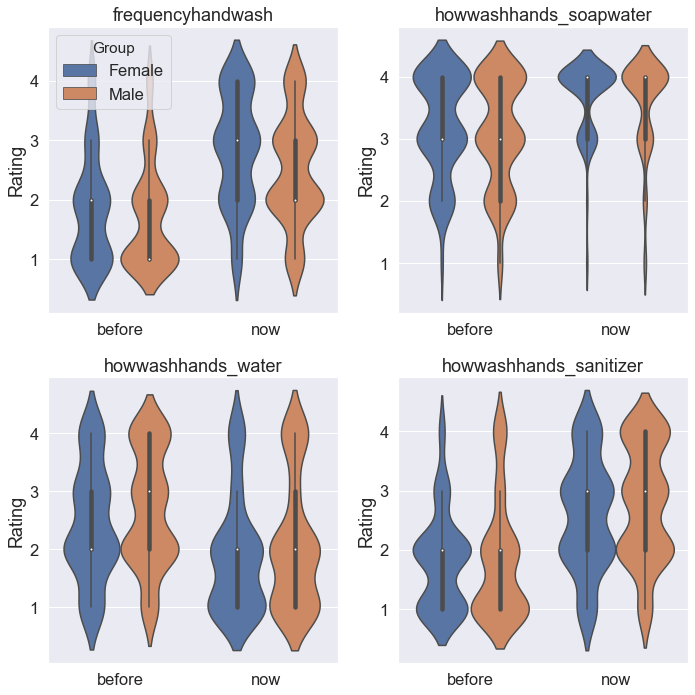

In [0]:
d['gender'] = d['gender'].replace({1: 'Male', 2: 'Female'})

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, sense in enumerate(['frequencyhandwash',
       'howwashhands_soapwater', 'howwashhands_water',
       'howwashhands_sanitizer']):
    make_violin(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()

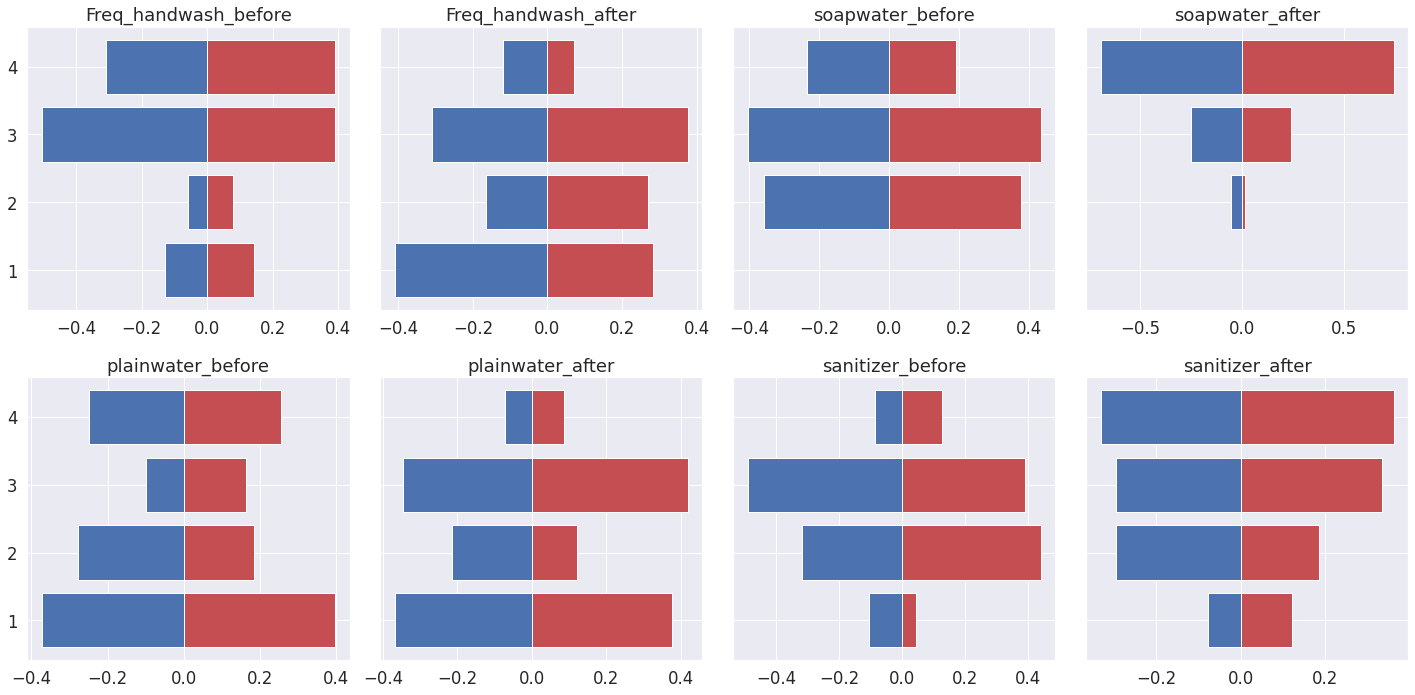

In [62]:
def make_pyramid(d, sense, ax, legend=True, group_var= 'Gender'):
    
    variable= sense
    d_clean = d.rename(columns={variable: 'value', group_var: 'Group', 'ID': 'ID'})
    group_col = 'Group'
    noM_F = d_clean['Group'].value_counts()

    colors = [plt.cm.Spectral(i/float(len(d_clean[group_col].unique())-1)) for i in range(len(d_clean[group_col].unique()))]
    
    data=d_clean.loc[d_clean[group_col]=='Female', :]
    Female_pop = data.groupby('value').count()['Age']/noM_F['Female']
    data=d_clean.loc[d_clean[group_col]=='Male', :]
    Male_pop = data.groupby('value').count()['Age']/noM_F['Male']
    ratings_group = d_clean.value.unique()[::-1]
    #print(Female_pop)
    ax.barh(ratings_group, Female_pop, color = 'r')
    ax.barh(ratings_group, -Male_pop, color = 'b')
    ax.set_title(variable)
    #plt.show()
     
d['Gender'] = d['Gender'].replace({1: 'Male', 2: 'Female'})
fig, axes = plt.subplots(2, 4, figsize=(20,10 ), sharey=True)

for i, sense in enumerate(['Freq_handwash_before','Freq_handwash_after',
       'soapwater_before','soapwater_after', 'plainwater_before','plainwater_after',
       'sanitizer_before','sanitizer_after']):
    ax = axes.ravel()
    make_pyramid(d, sense, ax=ax[i],  legend=(i==0), group_var='Gender')
plt.tight_layout()   


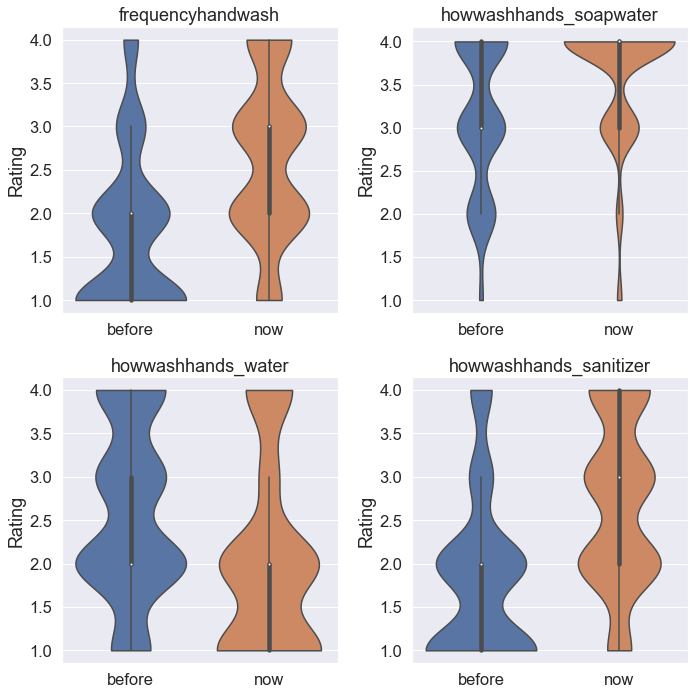

In [0]:
def make_violin_withoutgroup(d, sense, ax, legend=True):
    before = '%s' % sense
    during = '%s2' % sense
    d_clean = d.rename(columns={before: 'before', during: 'now', 'gender': 'Group'})
    d_clean = pd.melt(d_clean, value_vars=['before', 'now'], id_vars='Group')
    
    d_clean = d_clean.explode('value')
    d_clean['value'] = d_clean['value'].astype('float')
  
    g = sns.violinplot(x='variable', y='value',  data=d_clean, ax=ax, add_legend=False, cut=0)
 #   if not legend:
  #      g.legend_.remove()
    ax.set_xlabel('')
    ax.set_ylabel('Rating')
    ax.set_title(sense)
    

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, sense in enumerate(['frequencyhandwash',
       'howwashhands_soapwater', 'howwashhands_water',
       'howwashhands_sanitizer']):
    make_violin_withoutgroup(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()

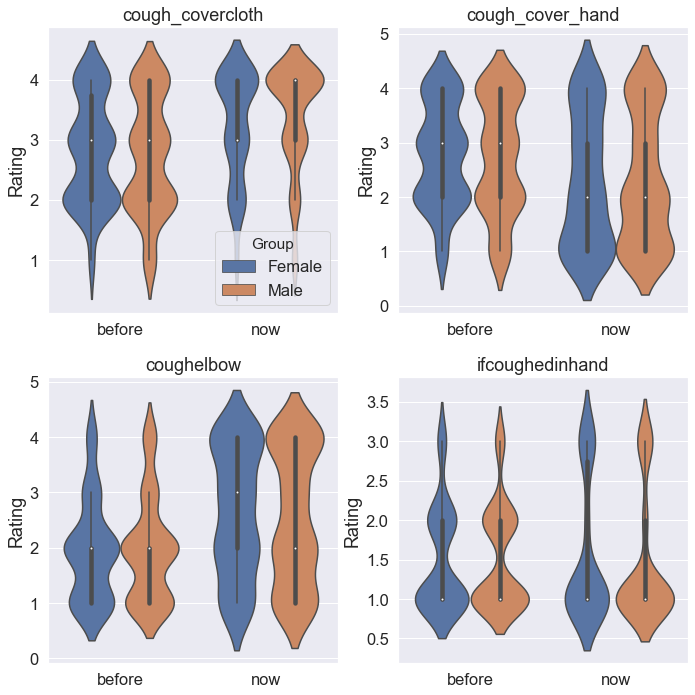

In [0]:


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, sense in enumerate(['cough_covercloth', 'cough_cover_hand', 'coughelbow', 'ifcoughedinhand']):
    make_violin(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()





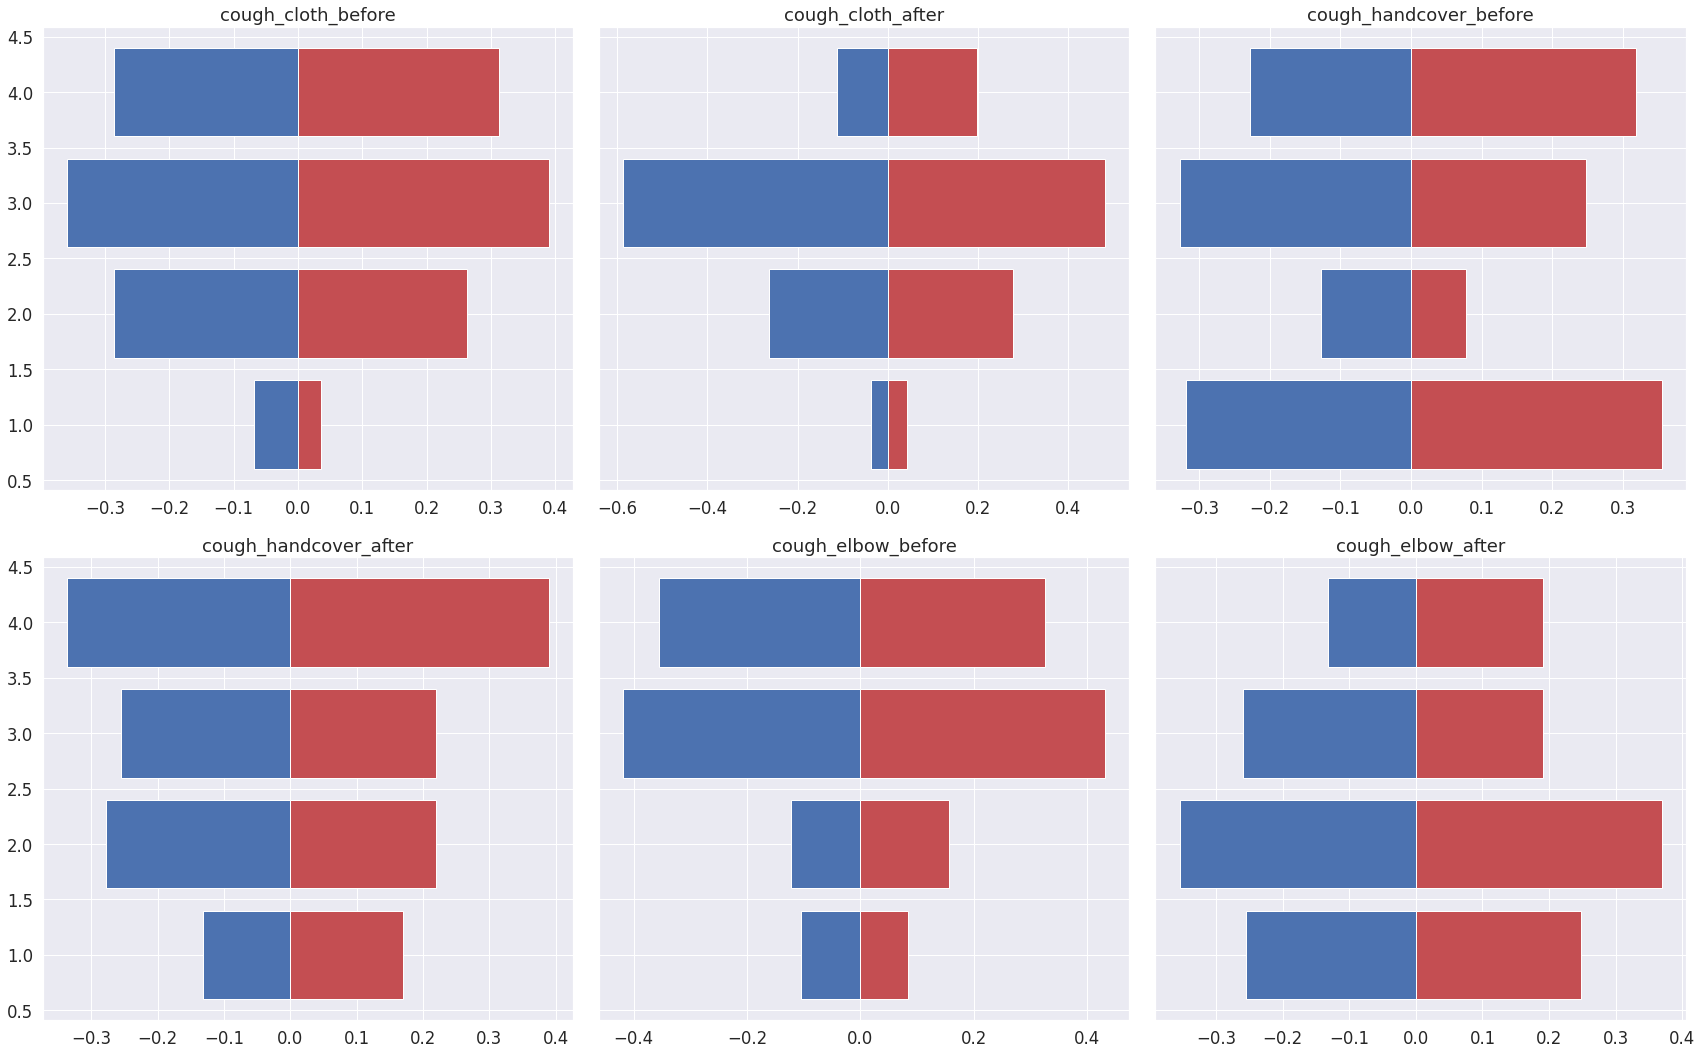

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(24, 15), sharey=True)

for i, sense in enumerate(['cough_cloth_before','cough_cloth_after', 'cough_handcover_before', 'cough_handcover_after',
                           'cough_elbow_before','cough_elbow_after']):
    ax = axes.ravel()

    make_pyramid(d, sense, ax=ax[i], legend=(i==0), group_var='Gender')
plt.tight_layout()  

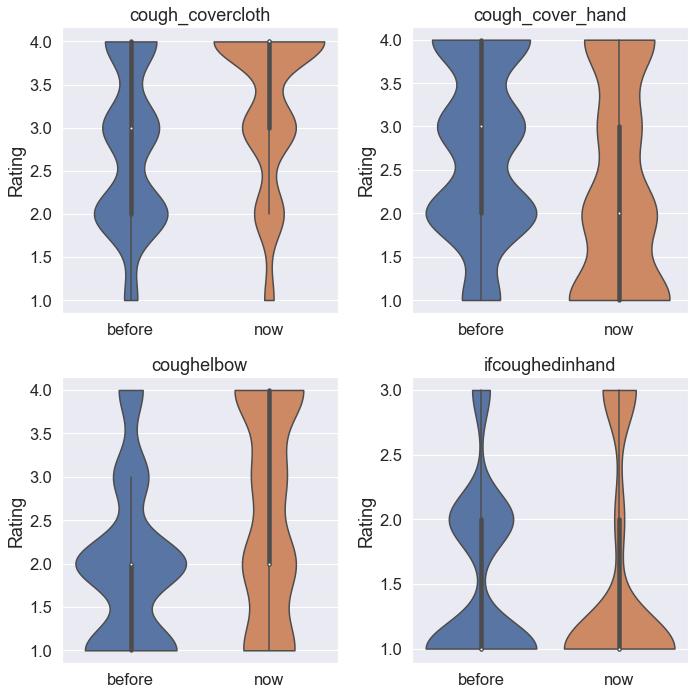

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, sense in enumerate(['cough_covercloth', 'cough_cover_hand', 'coughelbow', 'ifcoughedinhand']):
    make_violin_withoutgroup(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()

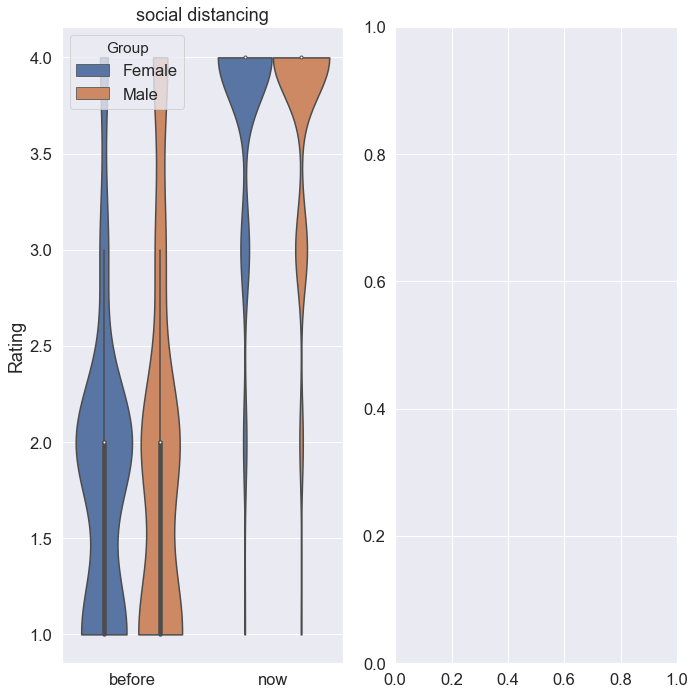

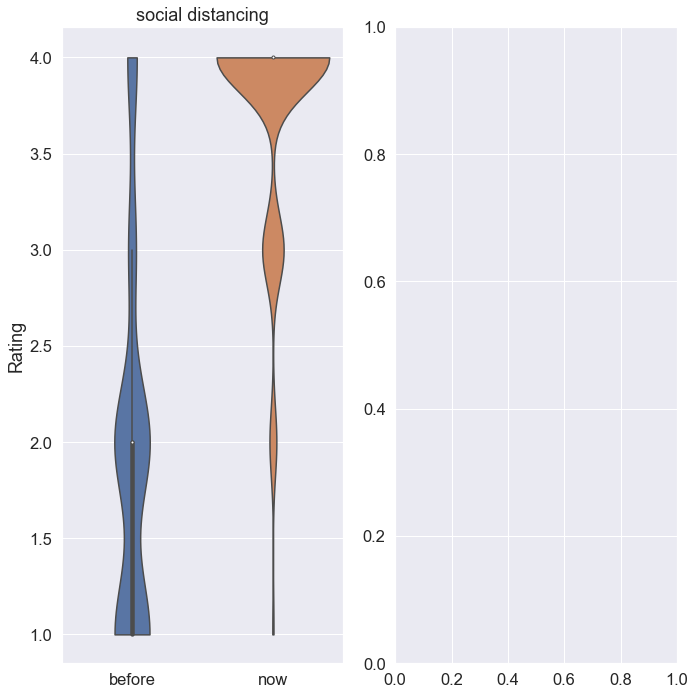

In [0]:

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
for i, sense in enumerate(['social distancing']):
    make_violin(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()

fig, axes = plt.subplots(1,2, figsize=(10, 10))
for i, sense in enumerate(['social distancing']):
    make_violin_withoutgroup(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()




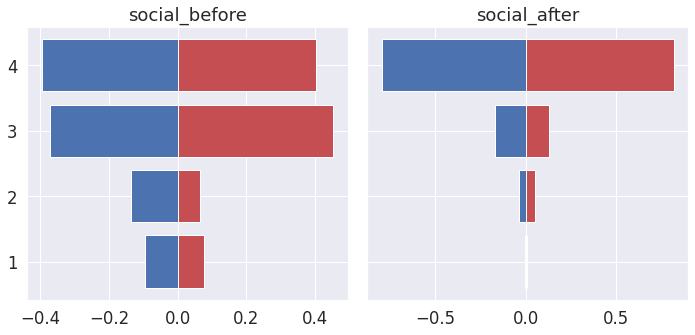

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


for i, sense in enumerate(['social_before','social_after']):
    ax = axes.ravel()

    make_pyramid(d, sense, ax=ax[i], legend=(i==0),group_var='Gender' )
plt.tight_layout()  

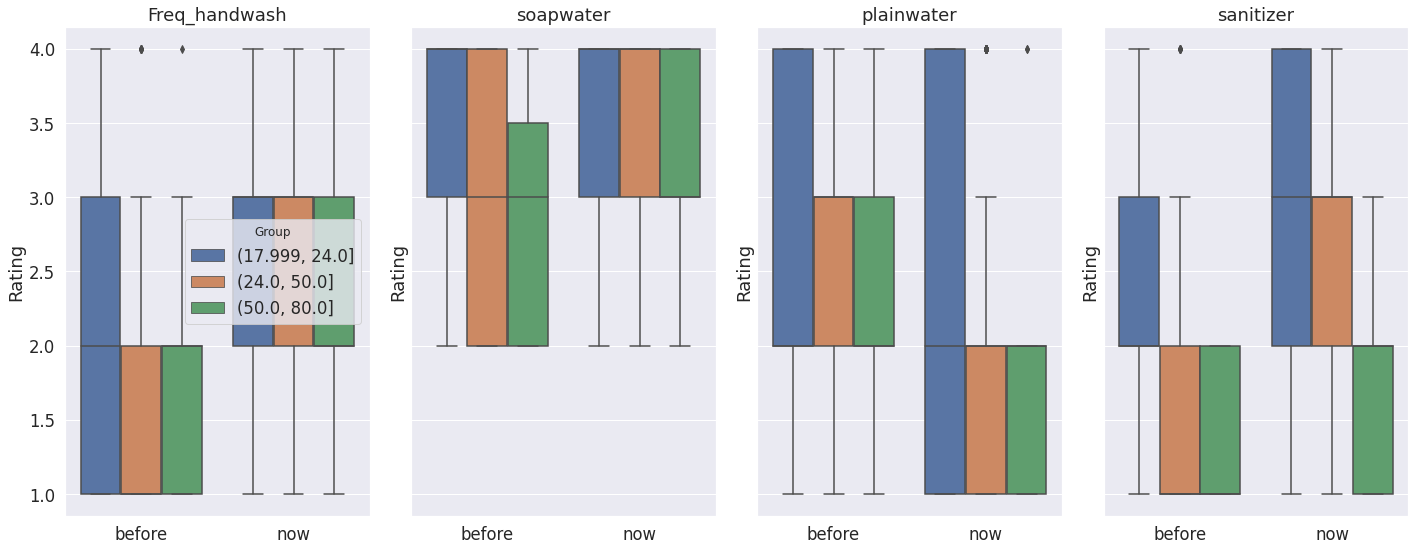

In [47]:
# changes with age

def make_box(d, sense, ax, legend=True):
    before = '%s_before' % sense
    during = '%s_after' % sense
    d_clean = d.rename(columns={before: 'before', during: 'now', 'age_cat': 'Group'})
    d_clean = pd.melt(d_clean, value_vars=['before', 'now'], id_vars='Group')
    
    d_clean = d_clean.explode('value')
    d_clean['value'] = d_clean['value'].astype('float')
    
   
    g = sns.boxplot(x='variable', y='value', hue='Group', data=d_clean, ax=ax)

    if not legend:
        g.legend_.remove()
    ax.set_xlabel('')
    ax.set_ylabel('Rating')
    ax.set_title(sense)

d['age_cat'] = pd.cut(d['Age'], bins=[18, 24, 50, 80], include_lowest=True)
d['age_cat'].unique()
fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)
for i, sense in enumerate(['Freq_handwash',
       'soapwater', 'plainwater',
       'sanitizer']):
    make_box(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()



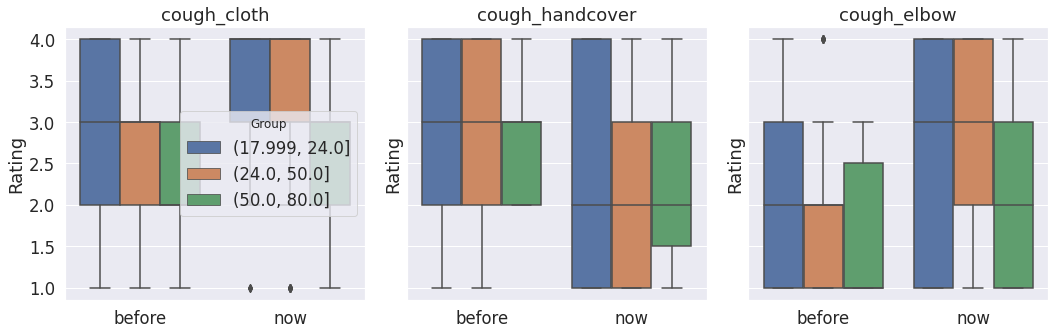

In [50]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5),sharey=True)
for i, sense in enumerate(['cough_cloth', 'cough_handcover', 'cough_elbow']):
    make_box(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()


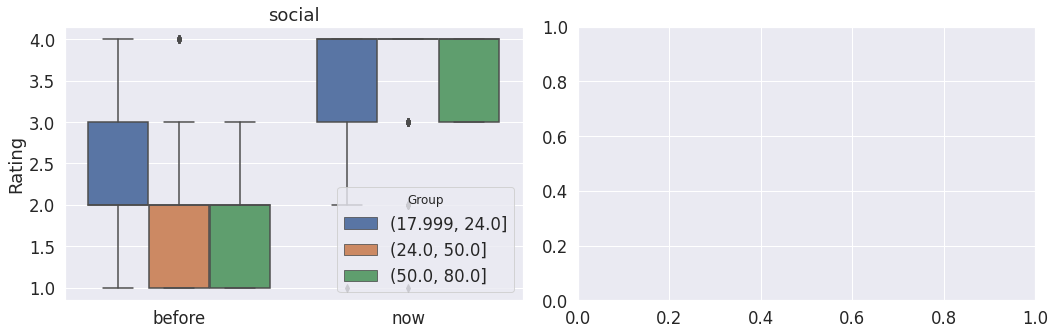

In [56]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, sense in enumerate(['social']):
    make_box(d, sense, ax=axes.flat[i], legend=(i==0))
plt.tight_layout()

# FIGURE 3 - Characterization - Overall Changes

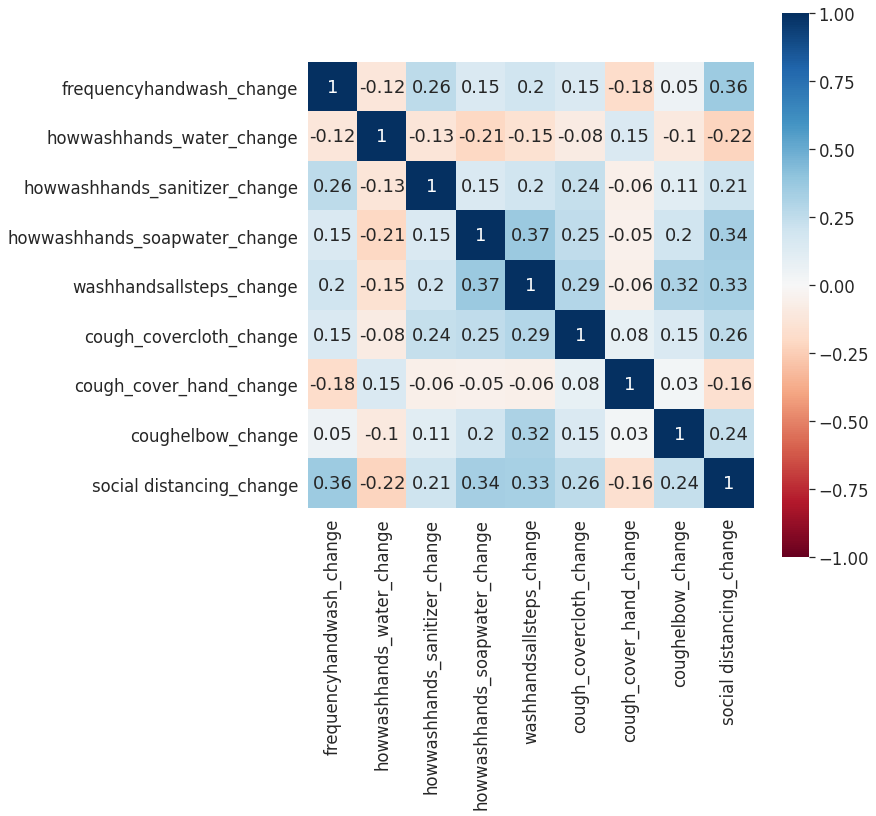

In [41]:
cols = ['frequencyhandwash_change', 'howwashhands_water_change', 'howwashhands_sanitizer_change', 
         'howwashhands_soapwater_change', 'washhandsallsteps_change', 'cough_covercloth_change',
         'cough_cover_hand_change','coughelbow_change','social distancing_change'] 
corrs = d[cols].corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corrs,vmin=-1, vmax=1, cmap='RdBu', square=True, annot=True)

# age by group

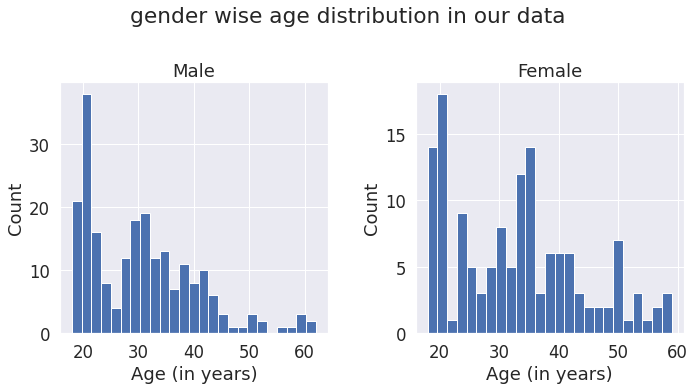

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, group in enumerate(['Male', 'Female']):
    axes[i].hist(d[d['Gender']==group]['Age'], bins=25)
    axes[i].set_title(group)
    axes[i].set_xlabel('Age (in years)')
    axes[i].set_ylabel('Count')
plt.suptitle('gender wise age distribution in our data', y=1.1)
plt.tight_layout()

# FIGURE 4 - Chemosensory clustering

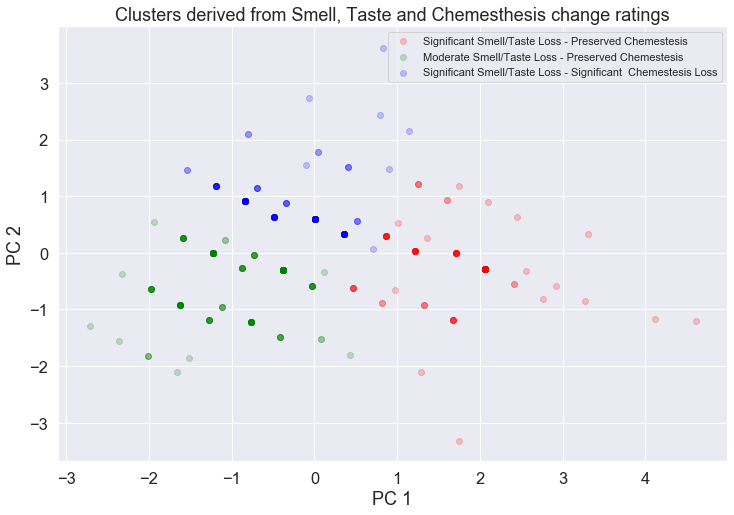

In [0]:
cols = ['frequencyhandwash_change', 'cough_covercloth_change', 'social distancing_change' ]
k = KMeans(n_clusters=3, random_state=123)
pca = PCA(n_components=2)
coords = pca.fit_transform(d[cols])
k.fit(d[cols]);
k.labels_ += 1 # To match R
colors = {1: 'red', 2: 'green', 3: 'blue'}
labels = {1: "Significant Smell/Taste Loss - Preserved Chemestesis",
          2: "Moderate Smell/Taste Loss - Preserved Chemestesis",
          3: "Significant Smell/Taste Loss - Significant  Chemestesis Loss"}
plt.figure(figsize=(12, 8))
for i, color in colors.items():
    plt.scatter(*coords[k.labels_==i].T, c=color, alpha=0.2, label=labels[i])
plt.title('Clusters derived from Smell, Taste and Chemesthesis change ratings')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(fontsize=11);

# Supplemental Figures

In [0]:
def make_hist(d, sense, ax, add_legend=True):
    change = '%s_change' % sense
    for group in ['Clinical exam', 'Lab test']:
        d[d['Group']==group][change].hist(bins=50, alpha=0.5, ax=ax, label=group)
    ax.set_xlabel('')
    ax.set_ylabel('Rating')
    ax.set_title('Change in %s' % sense.replace(' ', '').title())
    if add_legend:
        ax.legend()

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, sense in enumerate(['Smell', 'Taste', 'Nasal_occlusion', 'Chemesthesis']):
    make_hist(d, sense, ax=axes.flat[i], add_legend=(i==0))
plt.tight_layout()

### Gender by Group

In [0]:
def pie_by_group(d, col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 20))
    plt.suptitle('%s in COVID−19 lab tested vs. clinically examined respondents' % col.title(), y=0.63)
    for i, group in enumerate(['Clinical exam', 'Lab test']):
        d_group = d[d['Group']==group]
        gender = d_group[col].value_counts() / d_group.shape[0]
        labels = d_group[col].value_counts().index
        axes[i].pie(gender, autopct='%1.0f%%', startangle=90, counterclock=False)
        axes[i].set_title(group)
        axes[i].legend(labels, fontsize=9)
        
pie_by_group(d, 'Gender')

### Age by Group

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 20))
plt.suptitle('Gender in COVID−19 lab tested vs. clinically examined respondents', y=0.63)
for i, group in enumerate(['Clinical exam', 'Lab test']):
    d_group = d[d['Group']==group]
    gender = d_group['Gender'].value_counts() / d_group.shape[0]
    labels = d_group['Gender'].value_counts().index
    axes[i].pie(gender, autopct='%1.0f%%', startangle=90, counterclock=False)
    axes[i].set_title(group)
    axes[i].legend(labels, fontsize=9)

### Characterization - Smell Change

In [0]:
cols = ['Smell_change', 'phantosmia', 'parosmia', 'smell_loss', 'smell_fluctuations', 'Nasal_occlusion_change']
make_corrmat(d, cols)

### Characterization - Taste Change

In [0]:
cols = ['Taste_change']
cols += ['Changes_in_basic_tastes_%s' % x for x in ['sweet', 'salty', 'sour', 'bitter', 'savory/umami']]
make_corrmat(d, cols)